# <font color='#31708f'><center>Zendesk Tickets Word Cloud </center></font>

Set up the development environment: 
- Install Git
- Install Anaconda distribution
- Install Node.js
- Install Postman native app

<div class="alert alert-block alert-info">In Git Bash</div>

Set the working directory:

- Install Newman (command-line collection runner for Postman):

The following code block shows successful run of the command:

<div class="alert alert-block alert-info">In Base64</div>

AUTHORIZATION - Basic Authetication and API tokens<br> 
Use your company email address and Zendesk API key. The credentials must be sent in an Authorization header in the HTTP request. 

Authenticate a request with basic authentication and API token: 
- Combine your email address/token with your Zendesk API key with a colon:
```svetlana.staneva@eventsforce.com/token: {zendesk_api_key}```
- Base64-encode the resulting string:
```amRvZUBleGFtcGxlLmNvbTpwYSQkdzByZA==```

<div class="alert alert-block alert-info">In TextMechanic<div>

- Generate a lists of numbers (1-3000, 3001-5000, etc.) up to 59046
- Create a runner.csv files with a column ticket_id and listing numbers from 1 to 3000, etc.
- Move the files to the working directory JUPYTER_NOTEBOOKS

<div class="alert alert-block alert-info">In Postman 
<div>

Postman Comments Collection<br>
The Comments is a Postman collection that lists comments for Zendesk tickets from number 1 to 59046.

Create a new environment: 
- Click on the Cog icon 
- Click Add 
- In Add Environment enter a name for the environment - for instance, Test 
- Click Add

Select an active environment:
- Click the dropdown menu in the upper right corner of the Postman app to select an active environment (Test)

Request data via GET request: https://eventsforce.zendesk.com/api/v2/tickets/{ticket_id}/comments.json

In Headers include the base64-encoded string: 
- In Headers go to Presets > Manage Presets
- Add the Authorization and click Add: 
```Authorization: Basic {base64-encoded-string}```

In Tests add the following line of code:

Create Comments Collection
- Click on Collections > Create New Collection
- Enter a name - for instance, Comments and click Create

Save the Request in the Collection: 
- Click on Save As
- Select the Collection and click Save

Run the collection locally in the Postman Collection Runner with the runner_head.csv file.

Export the Comments collection: 
- Click on Collections 
- Hover over the Comments collection and click on the dots '...' that appear
- Click Export and again Export
- Save the file on the Desktop
- The exported file is COMMENTS.postman_collection.json
- Move the file COMMENTS.postman_collection.json to the working directory JUPYTER_NOTEBOOKS

<div class="alert alert-block alert-info">In Git Bash</div>

Run the Comments collection with the additional runner.csv file of key values (by 3000) and generate report in json.

In case it gives an error 'JavaScript heap out of memory' run the code in the following format:

or

or run the Comments collection with the additional runner.csv file of key values (by 1000) and generate report in json.

In order to run multiple runs with different runner.csv files, create a name.sh file listing the commands:

Run the .sh file:

Make sure glob.glob returns a list of files. List all json files in newman folder. 

In [1]:
import glob
file_list = glob.glob('C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman/*.json') 
for f in file_list:
    print(f)

C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-06-42-13-124-0-ticketid-upto-3000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-07-10-36-030-0-ticketid-upto-6000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-07-39-30-838-0-ticketid-upto-9000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-08-09-36-127-0-ticketid-upto-12000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-12-31-11-446-0-ticketid-upto-15000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-13-02-56-064-0-ticketid-upto-18000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\newman-run-report-2020-06-25-17-00-27-428-0-ticketid-upto-21000.json
C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\

Process multiple files. Parse JSON - convert from JSON to Python. When you open the file specify the encoding.

In [ ]:
import json 
def extract_all():
    final_list =[]  
    for filename in file_list: 
        with open(filename, 'r', encoding="utf8") as file: 
            output_json = json.load(file)
            for (k, v) in output_json.items():
                if k == "run":
                    executions_values = v["executions"]
                    for ticket in executions_values:
                        single_ticket = ticket
                        for (k1, v1) in single_ticket.items():
                            if k1 == "assertions":
                                for elem in v1: 
                                    for (k2, v2) in elem.items():
                                        if k2 == 'assertion':
                                            res2 = json.loads(v2)
                                            for (k3, v3) in res2.items():
                                                if k3 == 'comments':
                                                    for elem1 in v3:
                                                        for (k4, v4) in elem1.items():
                                                            if k4 == 'body':
                                                                final_list.append(v4)
    return(final_list)

DO NOT TOUCH ORIGINAL BELOW

In [48]:
def extract_text_from_ticket(element):
    values= []
    for (k1, v1) in element.items():
        if k1 == "assertions":
            for elem in v1: 
                for (k2, v2) in elem.items():
                    if k2 == 'assertion':
                        res2 = json.loads(v2)
                        for (k3, v3) in res2.items():
                            if k3 == 'comments':
                                for elem1 in v3:
                                    for (k4, v4) in elem1.items():
                                        if k4 == 'body':
                                            values_executions = v['executions']
                                            values.append(value_executions)
    return(values)

In [71]:
ticket_list = []
for ticket in value_executions:
        output = extract_text_from_ticket(ticket)
        joined_output =' '.join(output)
        ticket_list.append(joined_output)

NameError: name 'values' is not defined

(Optional) if you would like to see the text of the tickets:

In [ ]:
for (k, v) in data.items():
    if k == "run":
        value_executions = v['executions']
for element in value_executions: 
    for (k1, v1) in element.items():
        if k1 == "assertions":
            for elem in v1: 
                for (k2, v2) in elem.items():
                    if k2 == 'assertion':
                        res2 = json.loads(v2)
                        for (k3, v3) in res2.items():
                            if k3 == 'comments':
                                for elem1 in v3:
                                    for (k4, v4) in elem1.items():
                                        if k4 == 'body':
                                                print(v4)

<div class="alert alert-block alert-info">In Anaconda Prompt (run as Admin)</div>

- Install wordcloud package:

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

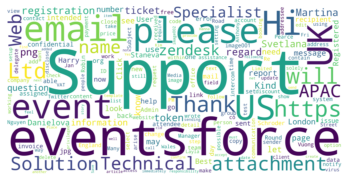

In [13]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      width = 4000,
                      height = 2000,
                      max_words=200,  
                      collocations = False
                     ).generate(' '.join(ticket_list))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

MOVE TO NEW FILE WHATS BELOW

In [14]:
from time import time

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
docs = ticket_list

In [16]:
cv=CountVectorizer()

In [17]:
word_count_vector=cv.fit_transform(docs)

In [18]:
word_count_vector.shape

(1046, 15436)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
len(ticket_list)

In [ ]:
ticket_list[3000]